In [26]:
import numpy as np
import matplotlib.pyplot as plt 
from sklearn.datasets import make_blobs
from sklearn.metrics import accuracy_score

dimensions de X:  (100, 2)
dimension de y:  (100, 1)


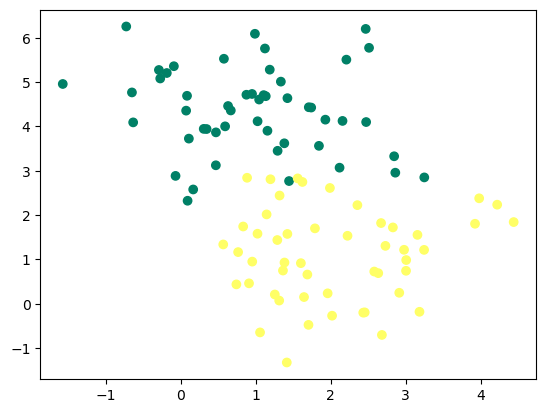

In [5]:
X, y = make_blobs(n_samples= 100, n_features= 2, centers= 2, random_state= 0)
y = y.reshape(y.shape[0], 1)

print('dimensions de X: ', X.shape)
print('dimension de y: ', y.shape)

plt.scatter(X[:,0], X[:, 1], c=y, cmap='summer')
plt.show()

In [6]:
def initialisation(X):
    W = np.random.randn(X.shape[1], 1)
    b = np.random.randn(1)
    return (W, b)


In [9]:
def model(X, W, b):
    Z = X.dot(W) + b
    A= 1/ (1 + np.exp(-Z))
    return A

In [13]:
def log_loss(A, y):
    return 1 / len(y) * np.sum(-y * np.log(A) - (1 - y) * np.log(1 - A))

In [18]:
def gradients(A, X, y):
    dW = 1 / len(y) * np.dot(X.T, A - y)
    db = 1 / len(y) * np.sum(A - y)
    return (dW, db)

In [22]:
def update(dW, db, W, b, learning_rate):
    W = W - learning_rate * dW
    b = b - learning_rate * db
    return (W, b)

In [38]:
def predict(X, W, b):
    A = model(X, W, b)
    print(A)
    return A>= 0.5

In [39]:
def artificial_neuron(X, y, learning_rate=0.1, n_iter=100):
    #initialisation W, b 
    W, b= initialisation(X)
    Loss= []
    
    for i in range(n_iter):
        A = model(X, W, b)
        Loss.append(log_loss(A, y))
        dW, db = gradients(A, X, y)
        W, b = update(dW, db, W, b, learning_rate)

    y_pred = predict(X, W, b)
    print(accuracy_score(y, y_pred))
    plt.plot(Loss)
    plt.show()
    
    return(W, b)

[[0.93991751]
 [0.75273461]
 [0.01097868]
 [0.18327041]
 [0.93953573]
 [0.3643478 ]
 [0.09363297]
 [0.91453563]
 [0.06938965]
 [0.84561151]
 [0.0476436 ]
 [0.84647818]
 [0.03842756]
 [0.03051092]
 [0.6926284 ]
 [0.96599385]
 [0.98232665]
 [0.05580343]
 [0.72439056]
 [0.63616337]
 [0.06291726]
 [0.05402709]
 [0.40830801]
 [0.01066059]
 [0.926978  ]
 [0.0477891 ]
 [0.86882621]
 [0.01487396]
 [0.08569151]
 [0.70712905]
 [0.96376886]
 [0.06194278]
 [0.66549583]
 [0.9642427 ]
 [0.41159696]
 [0.24307266]
 [0.75776292]
 [0.53548865]
 [0.45850524]
 [0.48195724]
 [0.10040383]
 [0.08649335]
 [0.00228311]
 [0.19234161]
 [0.23310351]
 [0.80382663]
 [0.94921225]
 [0.94315591]
 [0.01015302]
 [0.01677803]
 [0.91572488]
 [0.57260519]
 [0.05677966]
 [0.05666415]
 [0.76532187]
 [0.05997487]
 [0.66612986]
 [0.79811325]
 [0.9221949 ]
 [0.98223142]
 [0.63703884]
 [0.19884024]
 [0.01012687]
 [0.89447819]
 [0.02317058]
 [0.37813164]
 [0.05633512]
 [0.57946948]
 [0.91138524]
 [0.28605815]
 [0.2037817 ]
 [0.89

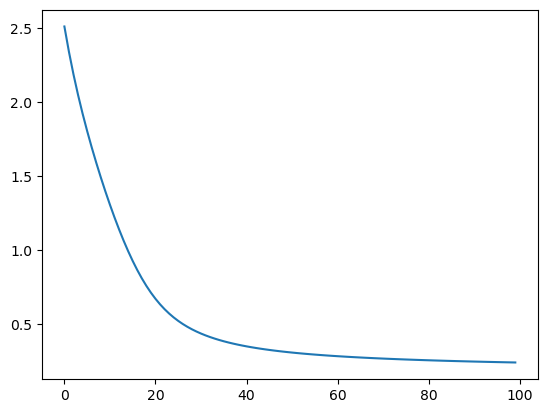

In [40]:
W, b = artificial_neuron(X, y)

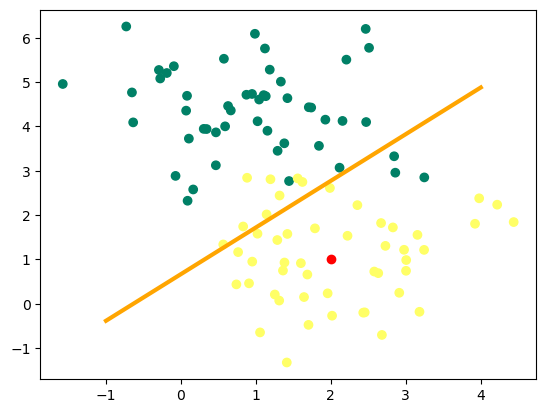

[0.84507459]


array([ True])

In [43]:
new_plant = np.array([2, 1])

x0 = np.linspace(-1, 4, 100)
x1 = (-W[0] * x0 - b ) / W[1]
plt.scatter(X[:,0], X[:, 1], c=y, cmap='summer')
plt.scatter(new_plant[0], new_plant[1], c='r')
plt.plot(x0, x1, c='orange', lw = 3)
plt.show()

predict(new_plant, W, b)